In [1]:
pip install numpy pandas matplotlib

Total Income over 365 days: $21224869.60
Mean Daily Income: $58150.33
Standard Deviation of Daily Income: $58000.31


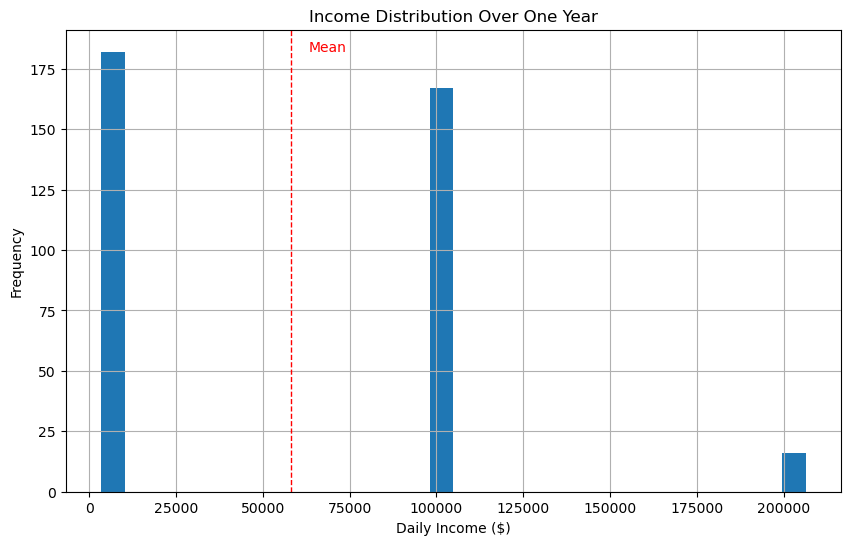

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
NUM_APPRENTICES = 3
BASE_POTION_PRICE = 1000
DAYS = 365
OVERTIME_COST = 7000

# Spells Effects
HASTE_BOOST = 1.18  # 18%
EMPOWER_BOOST = 100  # $100 increase in selling price
LADY_LUCK_CHANCE = 0.12  # 12% chance to double output

def simulate_day(spell_casts, overtime=False):
    daily_output = [1] * NUM_APPRENTICES  # Base output of each apprentice
    
    # Apply spells
    for spell in spell_casts:
        if spell == 'Haste':
            daily_output[0] *= HASTE_BOOST
        elif spell == 'Empower':
            daily_output[1] += EMPOWER_BOOST
            
    # Calculate total potions produced
    total_potions = sum(daily_output)
    
    # Apply Lady Luck effect
    if np.random.rand() < LADY_LUCK_CHANCE:
        total_potions *= 2
    
    # Calculate income from potions sold
    total_income = total_potions * BASE_POTION_PRICE
    
    if overtime:
        total_potions += NUM_APPRENTICES  # Each apprentice produces one extra potion on overtime
        total_income += NUM_APPRENTICES * BASE_POTION_PRICE
    
    return total_potions, total_income

def run_simulation():
    incomes = []
    
    for day in range(DAYS):
        spell_casts = ['Haste', 'Empower'] if day % 2 == 0 else ['Haste', 'Haste']  # Example spell rotation
        income = simulate_day(spell_casts)
        incomes.append(income[1])  # Append only the income
    
    return incomes

# Run the simulation
incomes = run_simulation()

# Analyze results
total_income = sum(incomes)
mean_income = np.mean(incomes)
std_dev_income = np.std(incomes)

# Print results
print(f"Total Income over {DAYS} days: ${total_income:.2f}")
print(f"Mean Daily Income: ${mean_income:.2f}")
print(f"Standard Deviation of Daily Income: ${std_dev_income:.2f}")

# Plotting the income distribution
plt.figure(figsize=(10,6))
plt.hist(incomes, bins=30, color='blue', alpha=0.7)
plt.title('Income Distribution Over One Year')
plt.xlabel('Daily Income ($)')
plt.ylabel('Frequency')
plt.axvline(mean_income, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_income + 5000, max(plt.hist(incomes, bins=30)[0]), 'Mean', color='red')
plt.grid()
plt.show()